In [80]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from utils.doors import DoorType
from utils.line import Line
from utils.params import Params
plt.style.use('ggplot')
params = Params()
np.random.seed(3407) # need to ensure # people generated is same for both line

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
def average_multiple_queue_length():
    """
    Returns
    -------
    avg_normal: float
        average queue length for normal door
    avg_open: float
        average queue length for keep open door
    normal_num, open_num: list
        queue length for normal and open door
    """
    TotalLineOpen = []
    TotalLineNormal = []
    paramsOpen = Params()
    paramsNormal = Params()
    for i in range(params.laneNum):
        TotalLineOpen.append(Line(DoorType.keepOpen,i))
        TotalLineOpen[i].params = paramsOpen
        TotalLineNormal.append(Line(DoorType.normal,i))
        TotalLineNormal[i].params = paramsNormal
    counter = sum([TotalLineNormal[t].PassingCounter for t in range(params.laneNum)])
    while counter == 0:
        for i in range(params.laneNum):
            TotalLineNormal[i].forward(TotalLineNormal)
        counter = sum([TotalLineNormal[t].PassingCounter for t in range(params.laneNum)])
    counter = sum([TotalLineOpen[t].PassingCounter for t in range(params.laneNum)])
    while counter == 0:
        for i in range(params.laneNum):
            TotalLineOpen[i].forward(TotalLineOpen)
        counter = sum([TotalLineOpen[t].PassingCounter for t in range(params.laneNum)])
    # average queue length
    sim_step = 1000 * params.timestep
    curr_step, counter = 0, 0
    normal_num, open_num = [], []
    while curr_step < sim_step:
        for i in range(params.laneNum):
            TotalLineNormal[i].forward(TotalLineNormal)
            TotalLineOpen[i].forward(TotalLineOpen)
        curr_step += params.timestep
        if curr_step % int(4*params.timestep) == 0:
            normal_num.append(np.mean([TotalLineNormal[j].count_occupied() for j in range(params.laneNum)]))
            open_num.append(np.mean([TotalLineOpen[j].count_occupied() for j in range(params.laneNum)]))
            counter += 1
    return sum(normal_num) / counter, sum(open_num) / counter, normal_num, open_num

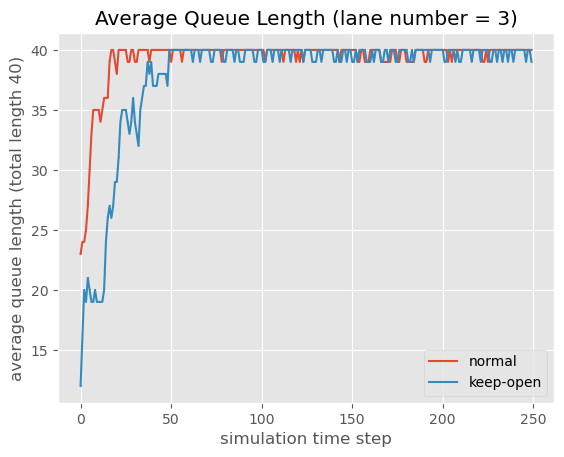

In [109]:
avg_normal, avg_open, normal_queue, open_queue = average_multiple_queue_length()
import pandas as pd
normal_que = pd.Series(normal_queue)
open_que = pd.Series(open_queue)
plt.plot(normal_que.rolling(window=1).mean(), ',-', label='normal')
plt.plot(open_que.rolling(window=1).mean(), ',-', label='keep-open')
plt.title('Average Queue Length (lane number = 3)')
plt.xlabel('simulation time step')
plt.ylabel('average queue length (total length 40)')
plt.legend()
plt.savefig('../data/queue_length_poisson_three_lane_high.png', dpi=200)

In [108]:
avg_open

8.548

In [35]:
avg_open

9.999999999999998